# 1. Import Libraries and Generate Data

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate synthetic regression data
X_raw, y = make_regression(n_samples=100, n_features=3, noise=20, random_state=0)

# 2. Calculate Multiple Linear Regression Coefficients

In [73]:
# Add intercept term
X = np.c_[np.ones(X_raw.shape[0]), X_raw]

# Calculate the coefficients using the Normal Equation
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Generate predicted values
y_pred = X @ beta

# 3. Visualize Data and Regression Line

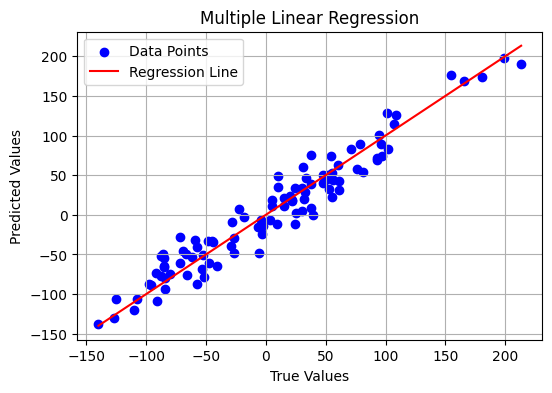

In [74]:
plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred, color='blue', label='Data Points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# 4. Calculate Performance Metrics

In [75]:
# Residual Sum of Squares (RSS)
RSS = ((y - y_pred) ** 2).sum()

# Total Sum of Squares (TSS)
TSS = ((y - y.mean()) ** 2).sum()

# Coefficient of Determination (R²)
R_squared = 1 - (RSS / TSS)

# Mean Squared Error (MSE)
mse = ((y_pred - y) ** 2).mean()

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Residuals (errors)
residuals = y - y_pred

# Correlation between true and predicted values
correlation_coefficient = np.corrcoef(y, y_pred)[0, 1]


# Print metrics with explanations
print(f"R-squared (explained variance): {R_squared:.2f}")
print(f"Mean Squared Error (average squared error): {mse:.2f}")
print(f"Root Mean Squared Error (average error magnitude): {rmse:.2f}")
print(f"Correlation Coefficient (between true and predicted values): {correlation_coefficient:.2f}")

R-squared (explained variance): 0.93
Mean Squared Error (average squared error): 369.55
Root Mean Squared Error (average error magnitude): 19.22
Correlation Coefficient (between true and predicted values): 0.97


# 5. Visualize Residuals

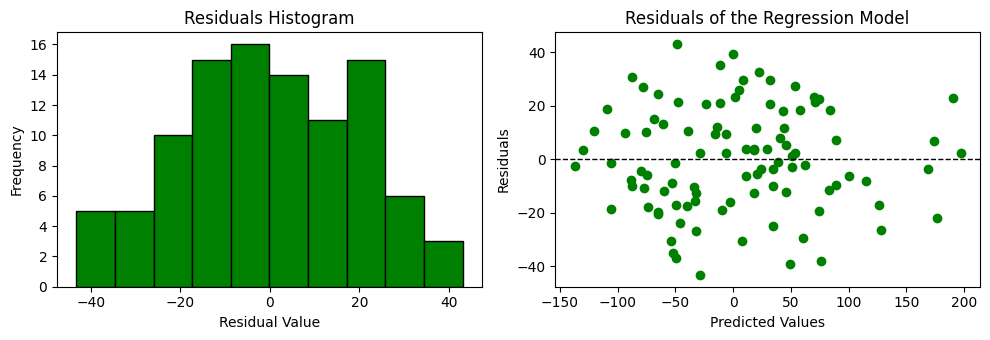

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))

# Residuals histogram
axs[0].hist(residuals, color='green', edgecolor='black')
axs[0].set_title("Residuals Histogram")
axs[0].set_xlabel("Residual Value")
axs[0].set_ylabel("Frequency")

# Residuals vs Predicted scatter plot
axs[1].scatter(y_pred, residuals, color='green')
axs[1].axhline(0, color='black', linestyle='--', linewidth=1)
axs[1].set_title("Residuals of the Regression Model")
axs[1].set_xlabel("Predicted Values")
axs[1].set_ylabel("Residuals")

plt.tight_layout()
plt.show()

# 6. Example of Linear Model for Classification

In [77]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np

# Generate synthetic classification data
X_raw, y = make_classification(n_samples=100, n_features=2, n_classes=2,n_informative=1, n_redundant=0, n_repeated=0,n_clusters_per_class=1, class_sep=0.3, random_state=0)

In [78]:
# Add intercept term
X = np.c_[np.ones(X_raw.shape[0]), X_raw]

# Calculate coefficients using the Normal Equation
beta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ beta

# Convert predicted values to binary class labels
y_pred_class = (y_pred > 0.5).astype(int)

# Prepare x1 range and compute decision boundary
x1_vals = np.linspace(X_raw[:, 0].min(), X_raw[:, 0].max(), 100)
x2_boundary = (0.5 - beta[0] - beta[1] * x1_vals) / beta[2]

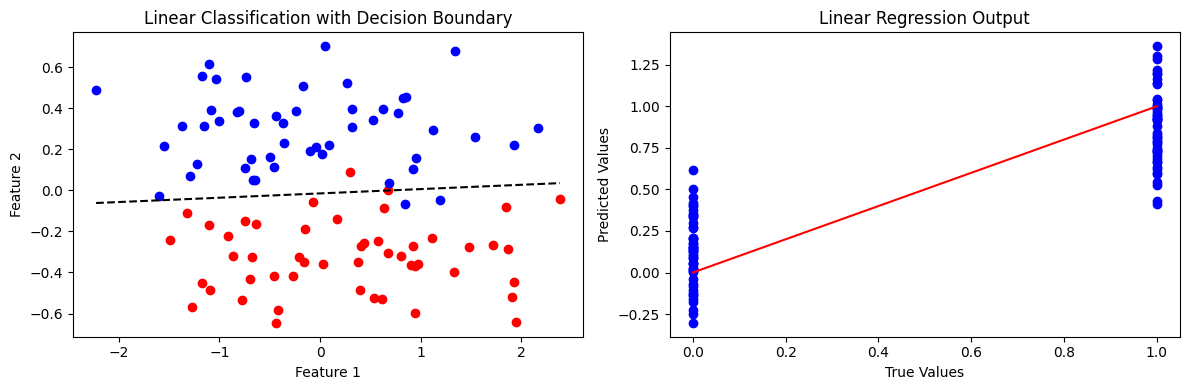

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Left plot: Classification scatter with decision boundary
axs[0].scatter(X_raw[y == 0, 0], X_raw[y == 0, 1], color='red', label='Class 0')
axs[0].scatter(X_raw[y == 1, 0], X_raw[y == 1, 1], color='blue', label='Class 1')
axs[0].plot(x1_vals, x2_boundary, color='black', linestyle='--', label='Decision Boundary (ŷ = 0.5)')
axs[0].set_title('Linear Classification with Decision Boundary')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Right plot: Predicted vs. True values
axs[1].scatter(y, y_pred, color='blue', label='Predicted vs Actual')
axs[1].plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Ideal Prediction')
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Linear Regression Output')

plt.tight_layout()
plt.show()